<a href="https://colab.research.google.com/github/piyushagni5/M.Tech_project_file/blob/master/EA10_30FB_clean_signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!pip freeze

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
absl-py==0.9.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
asgiref==3.2.7
astor==0.8.1
astropy==4.0.1.post1
astunparse==1.6.3
atari-py==0.2.6
atomicwrites==1.4.0
attrs==19.3.0
audioread==2.1.8
autograd==1.3
Babel==2.8.0
backcall==0.1.0
beautifulsoup4==4.6.3
bleach==3.1.5
blis==0.4.1
bokeh==1.4.0
boto==2.49.0
boto3==1.13.13
botocore==1.16.13
Bottleneck==1.3.2
branca==0.4.1
bs4==0.0.1
CacheControl==0.12.6
cachetools==3.1.1
catalogue==1.0.0
certifi==2020.4.5.1
cffi==1.14.0
chainer==6.5.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.4.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.1
coverage==3.7.1
coveralls==0.5
crcmod==1.7
csaps==0.11.0
cufflinks==0.17.3
cvxopt==1.2.5
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.3
Cython==0.29.18
daft==0.0.4
dask==2.12.0
dataclasses==0.7
datascience==0.10.6
decorato

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install csaps

In [0]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=8e00083cc608a55db85b2b3b95a3e04a58752a797b8037e2ed54d59b190c27ed
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [0]:
from google.colab import files

import wave
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import random

from scipy.io.wavfile import read
import scipy

from random import random
import math
from numpy.linalg import inv
from scipy.linalg import toeplitz

import wave, os, glob

from scipy.interpolate import CubicSpline
from scipy.interpolate import PchipInterpolator as pchip

import librosa

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

#from pycm import *
from sklearn.svm import SVC

import time

from sklearn.utils import shuffle
import csaps

from python_speech_features import mfcc
from python_speech_features import logfbank
from python_speech_features.sigproc import preemphasis
from python_speech_features.base import delta
from python_speech_features.base import fbank
from python_speech_features.sigproc import framesig

from termcolor import colored

import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import numpy as np

# Import GridsearchCV from Scikit Learn

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

### EMODB DATASET DESCRIPTION

1. 6 basics emotions- W-anger, L-boredom, E-disgust, A-anxiety, F-happiness, T-sadness, N-neutral

2. 5F, 5M (10 utterences, 5 short & 5 longer)

3. filename = 03a01Fa.wav --> 03-a01-F-a.wav
              03--> speaker detail(M,31 year old) others are [08,09,10,11,12,13,14,15,16]
              a01--> code for text
              F--> emotion code
              a--> if there are more than 2 versions (there are no. a,b,c...)

In [0]:
# fixed points taken for spline interpolation
xv=[0,0.35,0.69,1]    

# FIXED PARAMETER FOR endSPLINE 2
r_1=np.random.rand(4)
x2_fixed=np.linspace(0,1,6)
x2_modified=np.asarray(x2_fixed)

total_fbank = 30
nf=26

# nf equidistant point in between 0 & 1
xx=np.linspace(0,1,nf+2)              # will replace xx_full

yv=np.zeros((total_fbank,4))                 # initialising y values for spline 1
#y2_rand=np.zeros((total_fbank,4))            # initialising y values for spline 2
y2_rand=np.zeros((total_fbank,6))

sigma=np.zeros(total_fbank)           # 1-D arrray
rho=np.zeros(total_fbank)

EA_population=np.zeros((total_fbank,10))           # random EA population


In [0]:
x2_modified

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [0]:
for fb in range (total_fbank):                               # total_filterbank
       
    #PARAMETER INITIALIZATION FOR SPLINE 1   
    a=0.1                                            #parameter to limit range of spline in bet. 0 & 1   
    y1=a+random()*(1-2*a)
    delta=random()*(1-a-y1)
    y2=y1+delta
    
    yv[fb][:]=[0,y1,y2,1]
    
    # 1st derivative calculation at end points
    s1 = xv[0]-xv[1]         # sigma is the 1st derivative at x=0,y=0
    s2 = xv[0]-xv[2]
    s3 = xv[0]-xv[3]
    s12 = s1-s2
    s13 = s1-s3 
    s23 = s2-s3
    sigma[fb]=-(s1*s2/(s13*s23*s3))*yv[fb][3]+(s1*s3/(s12*s2*s23))*yv[fb][2]-(s2*s3/(s1*s12*s13))*yv[fb][1]+(1./s1+1./s2+1./s3)*yv[fb][0]
    
    s11 = xv[3]-xv[2]         #rho is the 1st derivative at x=1,y=1
    s22 = xv[3]-xv[1]
    s33 = xv[3]-xv[0]
    s_12 = s11-s22 
    s_13 = s11-s33 
    s_23 = s22-s33
    rho[fb]=-(s11*s22/(s_13*s_23*s33))*yv[fb][0]+(s11*s33/(s_12*s22*s_23))*yv[fb][1]-(s22*s33/(s11*s_12*s_13))*yv[fb][2]+(1./s11+1./s22+1./s33)*yv[fb][3]
    
    # PARAMETER INTIALIZATION FOR SPLINE 2
    y2_rand[fb,:]= np.random.rand(6)*(0.9-0.25)+0.25
    
    #cc=[y1, delta, sigma[0,fb], rho[0,fb]]+ y2_rand[fb,:].tolist()
    EA_population[fb,:]=[y1, delta, sigma[fb], rho[fb]]+ y2_rand[fb,:].tolist()


In [0]:
fs=8000

X_all = []
Y_all = []

path = '/content/drive/My Drive/MTP Project code /emodb/wav'

for filename in glob.glob(os.path.join(path, '*.wav')):
    
    data, sampling_rate = librosa.load(filename,sr=None)
    
    X_all.append(data)
    if (filename[57]=='W'):
        Y_all.append(0)  
    elif(filename[57]=='L'):
        Y_all.append(1)
    elif(filename[57]=='E'):
        Y_all.append(2)
    elif(filename[57]=='A'):
        Y_all.append(3)
    elif(filename[57]=='F'):
        Y_all.append(4)
    elif(filename[57]=='T'):
        Y_all.append(5)
    else:                                #(filename[22]=='N')
        Y_all.append(6)
        
X_pre_emp = []
N_all = len(X_all)

for i in range(N_all):
    X_pre_emp.append(preemphasis(X_all[i], coeff=0.94))

In [0]:
len(X_all)

535

In [0]:
Y_all

In [0]:
##  RUNNING FROM THE PREVIOUS RESULT

from python_speech_features.base import delta


t1 = time.perf_counter()

from collections import OrderedDict
old_settings = np.seterr(all='print')
OrderedDict(np.geterr())

gen = 120                                 # no. of generation
g = 0


test_accuracy = np.zeros((total_fbank,gen))
test_accuracy_shuff = np.zeros((total_fbank, gen))
test_accuracy_noshuff = np.zeros((total_fbank, gen))

while(g<gen):
    
    for fb in range (total_fbank):                                           # fb=1:total_fbank
        
        # formation of spline 1
        y_spline1 = splineinterpolation(xv,yv[fb][:],EA_population[fb][2], EA_population[fb][3])  

        #plot(xx_mod,y_spline1)  
        y_min= min(y_spline1)                      
        y_max= max(y_spline1)

        ## OPTIMAIZATION OF FITER FREQ. LOCATION 
        freq=np.zeros(nf+1)
        for i in range (nf+1):                                   # i = 1:nf+1                            
            freq[i] = (y_spline1[i]-y_min)*fs/(2*(y_max-y_min))

        freq=np.sort(freq)

        ## OPTIMIZATION OF FILTER AMPLITUDE
        #y2_modified = [0.2]+ y2_rand[fb,:].tolist()+[1]
        y2_modified = y2_rand[fb,:].tolist()
        cs=csaps.CubicSmoothingSpline(x2_modified, y2_modified, smooth=1)
        #cs = pchip(x2_modified, y2_modified)
        y_spline2=cs(xx)               # xx consists nf+2 pts. including end points

        #plt.plot(x2_modified, y2_modified, 'o', label='data')
        #plt.plot(xx, cs(xx), label="S")

        maxi=0
        for i in range(nf-1):                                     #i=1:nf-1
            t=np.absolute(freq[i+2]-freq[i])
            if(t > maxi):
                maxi=t

        N=256
        col=math.ceil(maxi*N/fs)+10
        filters=np.zeros((26,col))

        BW=np.zeros(nf)
        for i in range (nf):                                         # i=1:nf
            BW[i]=6.23*pow(freq[i]/1000,2)+93.39*(freq[i]/1000)+28.52

        #plt.figure(figsize=(3,3))

        for i in range (nf):                                               # i=1:nf
            yline1=[]
            yline2=[]
            ff1=freq[i]-BW[i]/2
            ff2=freq[i]+BW[i]/2
            if(ff1>0):
                f1=np.arange(ff1,freq[i]+1,fs/N)                             #ff1:fs/N:freq(i)
            else:
                f1=np.arange(0,freq[i]+1,fs/N)                              #0:fs/N:freq[i]

            if(ff2>(fs/2)):
                f2=np.arange(freq[i],(fs/2)+1,fs/N)                         #freq(i):fs/N:(fs/2);
                freq_inter=np.intersect1d(f2,fs/2)
                if(len(freq_inter)==0):
                    f2=np.append(f2,fs/2)

            else:
                f2=np.arange(freq[i],ff2+1,fs/N)                                      #freq(i):fs/N:ff2;
                freq_inter=np.intersect1d(f2,ff2)
                if(len(freq_inter)==0):
                    f2=np.append(f2,ff2)

            if(freq[i]==0 or freq[i]==fs/2):
                if(freq[i]==0):
                    yline1.append(np.array([0]))
                    yline2.append(-y_spline2[i]*(f2-ff2)/(ff2-freq[i]))
                else:
                    yline1.append(-y_spline2[i]*(f1-ff1)/(ff1-freq[i]))
                    yline2.append(np.array([0]))

            elif(ff1<0 and freq[i]!=0 and ff2 <= fs/2 ):
                yline1.append(y_spline2[i]*f1/freq[i])
                yline2.append(-y_spline2[i]*(f2-ff2)/(ff2-freq[i]))

            elif(ff2 > (fs/2) and freq[i] < (fs/2) and ff1>0):
                yline1.append(-y_spline2[i]*(f1-ff1)/(ff1-freq[i]))
                yline2.append(-y_spline2[i]*(f2-(fs/2))/((fs/2)-freq[i]))
            else:
                yline1.append(-y_spline2[i]*(f1-ff1)/(ff1-freq[i]))
                yline2.append(-y_spline2[i]*(f2-ff2)/(ff2-freq[i]))

            L1=yline1[0].tolist()
            L2=yline2[0].tolist()
            yline= L1+L2

            k_len=len(yline)
            f_final=np.append(f1,f2)
            filters[i,0:k_len]=yline

            #plt.plot(f_final,filters[i,0:k_len])             # filters(i,1:k_len)

        #plt.plot(freq ,y_spline2[0:-1])                  # y_spline2(1:end-1)
        
        #y_noisy = AWGN_new(X_pre_emp, 10)
        y_noisy = X_pre_emp
        #X_set, mfcc_coeff, delta_coeff, delta_delta_coeff, frame_energy = Mfcc_revised_1(y_noisy, fs,freq,filters)
        X_set = Mfcc_feature(y_noisy, fs,freq,filters)
        """     
        # METHOD-1
        test_accuracy_shuff[fb,g], test_accuracy_noshuff[fb,g]  = parameter_tuning(X_set, Y_all)
    
    if (g < gen-1):
        EA_population, yv, y2_rand = Evolution(EA_population, test_accuracy_shuff, yv, g)
        
        ## method-1 end
        """
        seed = 42
        X_shuffle, y_shuffle = shuffle(X_set, Y_all, random_state=seed)
        X_train,X_test,Y_train,Y_test = data_norm_and_split(X_shuffle,y_shuffle)
        """
        # METHOD-2
        Y_test_pred, acc = SVM_accuracy(X_train, X_test, Y_train, Y_test)
        test_accuracy[fb,g] = acc
        """
        # METHOD-3
        test_svc = SVC(C=100,cache_size=200, class_weight=None, coef0=0.0,
                        decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
                        max_iter=-1, probability=False, random_state=None, shrinking=True,
                        tol=0.001, verbose=False)
        test_svc.fit(X_train, Y_train)
        test_accuracy[fb,g] = test_svc.score(X_test, Y_test)
        """
        # METHOD-4
        test_accuracy[fb,g] = best_estimator(X_set, Y_all)
        """

    print(test_accuracy)
    #if (g % 1 == 0):
    pd.DataFrame(test_accuracy).to_csv("3rd_test_acc_till_gen.csv".format(),index=None)
    !cp 3rd_test_acc_till_gen.csv "/content/drive/My Drive/MTP Project code /piyush_10EA_clean_signal_results"

    pd.DataFrame(EA_population).to_csv("3rd_EA10_pop_till_gen.csv".format(),index=None)
    !cp 3rd_EA10_pop_till_gen.csv "/content/drive/My Drive/MTP Project code /piyush_10EA_clean_signal_results"
    

    if (g < gen-1):
        EA_population, yv, y2_rand = Evolution(EA_population,test_accuracy,yv,g,y2_rand)

    g=g+1

    
## CHOOSING 4 BEST FILTERBANKS FROM THE POPULATION 

best_fbank = 4

ind_sort = np.argsort(test_accuracy[:,gen-1])
best4_ind = ind_sort[::-1][:4]                          ## select the last for ele. of ind_sort

ESFB=np.zeros((best_fbank,10))

for i in range(best_fbank):
    ESFB[i,:]=EA_population[best4_ind[i],:]

#np.savetxt("EA_population.csv", ESFB, delimiter=',', encoding=None,header='EA_population')
pd.DataFrame(ESFB).to_csv("3rd_best_filter_EA10_pop.csv",index=None)
!cp 3rd_best_filter_EA10_pop.csv "/content/drive/My Drive/MTP Project code /piyush_10EA_clean_signal_results"

accuracy_fbank_test = np.zeros(best_fbank)                          
accuracy_fbank=np.zeros((best_fbank,2))
yv_test=np.zeros((best_fbank,4))

for bfb in range(best_fbank):                             #cc=[y1, delta, sigma[0,fb], rho[0,fb]]+ y2_rand[fb,:].tolist()
    yv_test[bfb,1]=ESFB[bfb,0]                            # yv[fb][:]=[0,y1,y2,1]
    yv_test[bfb,2]=ESFB[bfb,0]+ESFB[bfb,1]

yv_test[:,3]=1
yv2_test=ESFB[:,4:]


for fb in range(best_fbank):
    
    # formation of spline 1
    y_spline1_t = splineinterpolation(xv,yv_test[fb,:],ESFB[fb,2], ESFB[fb,3])  


    #plot(xx_mod,y_spline1)  

    y_min_t = min(y_spline1_t)                      
    y_max_t = max(y_spline1_t)

    ## OPTIMAIZATION OF FITER FREQ. LOCATION 

    freq_t=np.zeros(nf+1)
    for i in range (nf+1):                                   # i = 1:nf+1                            
        freq_t[i] = (y_spline1_t[i]-y_min_t)*fs/ (2*(y_max_t-y_min_t))

    freq_t=np.sort(freq_t)

    ## OPTIMIZATION OF FILTER AMPLITUDE

    y2_mod_t =  yv2_test[fb,:].tolist()
    cs_t = csaps.CubicSmoothingSpline(x2_modified, y2_mod_t,smooth=1)
    y_spline2_t=cs_t(xx)               # xx consists nf+2 pts. including end points

    #plt.plot(x2_modified, y2_modified, 'o', label='data')
    #plt.plot(xx, cs(xx), label="S")

    maxi_t=0
    for i in range(nf-1):                                     #i=1:nf-1
        t=np.absolute(freq_t[i+2]-freq_t[i])
        if(t > maxi_t):
            maxi_t=t

    N=256
    col_t=math.ceil(maxi_t*N/fs)+10
    filters_t=np.zeros((26,col_t))

    BW_t=np.zeros(nf)
    for i in range (nf):                                         # i=1:nf
        BW_t[i]=6.23*pow(freq_t[i]/1000,2)+93.39*(freq_t[i]/1000)+28.52


    plt.figure(figsize=(6,3))
    #plt.subplot(2,2)
    
    for i in range (nf):                                               # i=1:nf
        yline1_t = []
        yline2_t = []

        ff1_t = freq_t[i]-BW_t[i]/2
        ff2_t = freq_t[i]+BW_t[i]/2
        if(ff1_t > 0):
            f1_t = np.arange(ff1_t, freq_t[i]+1, fs/N)                             #ff1:fs/N:freq(i)
        else:
            f1_t = np.arange(0, freq_t[i]+1, fs/N)                                                        #0:fs/N:freq[i]

        if(ff2_t > (fs/2)):
            f2_t = np.arange(freq_t[i],(fs/2)+1, fs/N)                         #freq(i):fs/N:(fs/2);
            freq_inter_t = np.intersect1d(f2_t, fs/2)
            if(len(freq_inter_t) == 0):
                f2_t = np.append(f2_t, fs/2)

        else:
            f2_t = np.arange(freq_t[i], ff2_t+1, fs/N)                                      #freq(i):fs/N:ff2;
            freq_inter_t = np.intersect1d(f2_t, ff2_t)
            if(len(freq_inter_t) == 0):
                f2_t = np.append(f2_t, ff2_t)


        if(freq_t[i] == 0 or freq_t[i] == fs/2):
            if(freq_t[i]==0):
                yline1_t.append(np.array([0]))
                yline2_t.append(-y_spline2_t[i]*(f2_t-ff2_t)/(ff2_t-freq_t[i]))
            else:
                yline1_t.append(-y_spline2_t[i]*(f1_t-ff1_t)/(ff1_t-freq_t[i]))
                yline2_t.append(np.array([0]))

        elif(ff1_t<0 and freq_t[i]!=0 and ff2_t <= fs/2 ):
            yline1_t.append(y_spline2_t[i]*f1_t / freq_t[i])
            yline2_t.append(-y_spline2_t[i]*(f2_t-ff2_t) / (ff2_t-freq_t[i]))

        elif(ff2_t > (fs/2) and freq_t[i] < (fs/2) and ff1_t > 0):
            yline1_t.append(-y_spline2_t[i]*(f1_t-ff1_t) / (ff1_t-freq_t[i]))
            yline2_t.append(-y_spline2_t[i]*(f2_t-(fs/2)) / ((fs/2)-freq_t[i]))
        else:
            yline1_t.append(-y_spline2_t[i]*(f1_t-ff1_t) / (ff1_t-freq_t[i]))
            yline2_t.append(-y_spline2_t[i]*(f2_t-ff2_t) / (ff2_t-freq_t[i]))


        L1_t = yline1_t[0].tolist()
        L2_t = yline2_t[0].tolist()
        yline_t = L1_t+L2_t

        k_len_t = len(yline_t)
        f_final_t = np.append(f1_t,f2_t)
        filters_t[i,0:k_len_t] = yline_t
        plt.plot(f_final_t, filters_t[i,0:k_len_t], color='k')             # filters(i,1:k_len)
        
    plt.xlabel('Frequency (kHz)')
    plt.ylabel('Gain')
    plt.ylim(0,1)
    plt.xlim(0,4000)
    plt.savefig('best_fbank {0}.jpg'.format(fb) ,bbox_inches ='tight' )
    #files.download('best_fbank {0}.jpg'.format(fb))

    plt.plot(freq_t , y_spline2_t[0:-1], color = 'r')                  # y_spline2(1:end-1)
    #plt.xlabel('Frequency (kHz)')
    #plt.ylabel('Gain')
    #plt.ylim(0,1)
    #plt.xlim(0,4000)
    plt.savefig('spline & best_fbank {0}.jpg'.format(fb), bbox_inches ='tight' )
    #files.download('spline & best_fbank {0}.jpg'.format(fb))
    plt.close()

    #best_feature_set, best_mfcc_coeff, best_delta_coeff, best_delta_delta_coeff, best_frame_energy = Mfcc_new_noisysig(X_pre_emp, fs, freq_t, filters_t)
    best_feature_set = Mfcc_feature(X_pre_emp, fs, freq_t, filters_t)
    
    print(colored("The observation is made for the best filter bank {}".format (fb), 'red', 'on_grey'), "\n")
    #accuracy_fbank[fb,0], accuracy_fbank[fb,1] = parameter_tuning(best_feature_set, Y_all)
    #print(accuracy_fbank)

    #seed = 42
    #X_shuffle, y_shuffle = shuffle(best_feature_set, Y_all, random_state=seed)
    #X_train_t, X_valid_t, Y_train_t, Y_valid_t = data_norm_and_split(X_shuffle,y_shuffle)
    #Y_test_pred, acc = SVM_accuracy(X_train_t, X_valid_t, Y_train_t, Y_valid_t)
    
    accuracy_fbank_test[fb] = best_estimator(best_feature_set, Y_all)

#np.savetxt("best_fbank_acc.csv", np.around(accuracy_fbank*100,2), delimiter=',', encoding=None,header='best_fbank_acc')
pd.DataFrame(accuracy_fbank_test).to_csv("2nd_best_fbank_acc.csv",index=None)
!cp 3rd_best_fbank_acc.csv "/content/drive/My Drive/MTP Project code /piyush_10EA_clean_signal_results"

t2 = time.perf_counter()

print(f'Finished in {(t2-t1)/60} minutes')

In [0]:
## This section should only be used when extract dat from drive file

ESFB_new = np.zeros((4,10))
EA_pop1 = pd.read_csv('/content/drive/My Drive/MTP Project code /piyush_10EA_clean_signal_results/3rd_EA10_pop_till_gen.csv')
EA_pop1 = EA_pop1.to_numpy()

EA_pop2 = pd.read_csv('/content/drive/My Drive/MTP Project code /piyush_10EA_clean_signal_results/2nd_EA10_pop_till_gen.csv')
EA_pop2 = EA_pop2.to_numpy()

EA_pop3 = pd.read_csv('/content/drive/My Drive/MTP Project code /piyush_10EA_clean_signal_results/EA10_pop_till_gen.csv')
EA_pop3 = EA_pop3.to_numpy()

ESFB_new[0,:] = EA_pop1[0,:]
ESFB_new[1,:] = EA_pop2[0,:]
ESFB_new[2,:] = EA_pop2[6,:]
ESFB_new[3,:] = EA_pop3[0,:]

"""

#EA_population_new = np.zeros((30,10))
EA_population_new = EA_pop1

#EA_population_new[:20,:] = EA_pop1[:20,:]
#EA_population_new[20:,:] = EA_population[20:,:]

yv[:,1]=EA_population_new[:,0]
yv[:,2]=EA_population_new[:,0]+EA_population_new[:,1]

y2_rand = EA_population_new[:,4:]

#temp_acc = pd.read_csv('/content/drive/My Drive/MTP Project code /piyush_10EA_clean_signal_results/3rd_test_acc_till_gen.csv')

temp_acc = temp_acc.to_numpy()

test_accuracy = temp_acc
gen_new = temp_acc.shape[1]
gen = gen_new
"""

In [0]:
## This section should only be used when extract dat from drive file


ESFB_0db = pd.read_csv("/content/drive/My Drive/MTP Project code /0db_results_fb_using_clean_mfcc/result_noisy_10_dim_EA/best_filter_EA0db_population.csv")
ESFB_0db = ESFB_0db.to_numpy()
ESFB_0db

In [0]:
### running only the test part using previous result

## CHOOSING 4 BEST FILTERBANKS FROM THE POPULATION 
import sklearn.metrics as metrics

best_fbank = 4

#ind_sort = np.argsort(test_accuracy[:,gen-1])
#best4_ind = ind_sort[::-1][:4]                          ## select the last for ele. of ind_sort

ESFB=np.zeros((best_fbank,10))

for i in range(best_fbank):
    ESFB[i,:]=EA_population_new[best4_ind[i],:]

#np.savetxt("EA_population.csv", ESFB, delimiter=',', encoding=None,header='EA_population')
pd.DataFrame(ESFB).to_csv("final_best_filter_EA10_pop.csv",index=None)
!cp final_best_filter_EA10_pop.csv "/content/drive/My Drive/MTP Project code /piyush_10EA_clean_signal_results/final_eval_using_fbank_der_clean_sig"

confusion_mat = []
class_report = []
accuracy_fbank_test = np.zeros(best_fbank)                          
accuracy_fbank=np.zeros((best_fbank,2))
yv_test=np.zeros((best_fbank,4))


for bfb in range(best_fbank):                             #cc=[y1, delta, sigma[0,fb], rho[0,fb]]+ y2_rand[fb,:].tolist()
    yv_test[bfb,1]=ESFB[bfb,0]                            # yv[fb][:]=[0,y1,y2,1]
    yv_test[bfb,2]=ESFB[bfb,0]+ESFB[bfb,1]

yv_test[:,3]=1
yv2_test=ESFB[:,4:]


for fb in range(best_fbank):
    
    # formation of spline 1
    y_spline1_t = splineinterpolation(xv,yv_test[fb,:],ESFB[fb,2], ESFB[fb,3])  


    #plot(xx_mod,y_spline1)  

    y_min_t = min(y_spline1_t)                      
    y_max_t = max(y_spline1_t)

    ## OPTIMAIZATION OF FITER FREQ. LOCATION 

    freq_t=np.zeros(nf+1)
    for i in range (nf+1):                                   # i = 1:nf+1                            
        freq_t[i] = (y_spline1_t[i]-y_min_t)*fs/ (2*(y_max_t-y_min_t))

    freq_t=np.sort(freq_t)

    ## OPTIMIZATION OF FILTER AMPLITUDE

    y2_mod_t =  yv2_test[fb,:].tolist()
    cs_t = csaps.CubicSmoothingSpline(x2_modified, y2_mod_t,smooth=1)
    y_spline2_t=cs_t(xx)               # xx consists nf+2 pts. including end points

    #plt.plot(x2_modified, y2_modified, 'o', label='data')
    #plt.plot(xx, cs(xx), label="S")

    maxi_t=0
    for i in range(nf-1):                                     #i=1:nf-1
        t=np.absolute(freq_t[i+2]-freq_t[i])
        if(t > maxi_t):
            maxi_t=t

    N=256
    col_t=math.ceil(maxi_t*N/fs)+10
    filters_t=np.zeros((26,col_t))

    BW_t=np.zeros(nf)
    for i in range (nf):                                         # i=1:nf
        BW_t[i]=6.23*pow(freq_t[i]/1000,2)+93.39*(freq_t[i]/1000)+28.52


    plt.figure(figsize=(6,4))
    #plt.subplot(2,2)
    
    for i in range (nf):                                               # i=1:nf
        yline1_t = []
        yline2_t = []

        ff1_t = freq_t[i]-BW_t[i]/2
        ff2_t = freq_t[i]+BW_t[i]/2
        if(ff1_t > 0):
            f1_t = np.arange(ff1_t, freq_t[i]+1, fs/N)                             #ff1:fs/N:freq(i)
        else:
            f1_t = np.arange(0, freq_t[i]+1, fs/N)                                                        #0:fs/N:freq[i]

        if(ff2_t > (fs/2)):
            f2_t = np.arange(freq_t[i],(fs/2)+1, fs/N)                         #freq(i):fs/N:(fs/2);
            freq_inter_t = np.intersect1d(f2_t, fs/2)
            if(len(freq_inter_t) == 0):
                f2_t = np.append(f2_t, fs/2)

        else:
            f2_t = np.arange(freq_t[i], ff2_t+1, fs/N)                                      #freq(i):fs/N:ff2;
            freq_inter_t = np.intersect1d(f2_t, ff2_t)
            if(len(freq_inter_t) == 0):
                f2_t = np.append(f2_t, ff2_t)


        if(freq_t[i] == 0 or freq_t[i] == fs/2):
            if(freq_t[i]==0):
                yline1_t.append(np.array([0]))
                yline2_t.append(-y_spline2_t[i]*(f2_t-ff2_t)/(ff2_t-freq_t[i]))
            else:
                yline1_t.append(-y_spline2_t[i]*(f1_t-ff1_t)/(ff1_t-freq_t[i]))
                yline2_t.append(np.array([0]))

        elif(ff1_t<0 and freq_t[i]!=0 and ff2_t <= fs/2 ):
            yline1_t.append(y_spline2_t[i]*f1_t / freq_t[i])
            yline2_t.append(-y_spline2_t[i]*(f2_t-ff2_t) / (ff2_t-freq_t[i]))

        elif(ff2_t > (fs/2) and freq_t[i] < (fs/2) and ff1_t > 0):
            yline1_t.append(-y_spline2_t[i]*(f1_t-ff1_t) / (ff1_t-freq_t[i]))
            yline2_t.append(-y_spline2_t[i]*(f2_t-(fs/2)) / ((fs/2)-freq_t[i]))
        else:
            yline1_t.append(-y_spline2_t[i]*(f1_t-ff1_t) / (ff1_t-freq_t[i]))
            yline2_t.append(-y_spline2_t[i]*(f2_t-ff2_t) / (ff2_t-freq_t[i]))


        L1_t = yline1_t[0].tolist()
        L2_t = yline2_t[0].tolist()
        yline_t = L1_t+L2_t

        k_len_t = len(yline_t)
        f_final_t = np.append(f1_t,f2_t)
        filters_t[i,0:k_len_t] = yline_t
        plt.plot(f_final_t, filters_t[i,0:k_len_t], color='k')             # filters(i,1:k_len)
        
    plt.xlabel('Frequency (kHz)')
    plt.ylabel('Gain')
    plt.ylim(0,1)
    plt.xlim(0,4000)
    plt.savefig('best_fbank {0}.jpg'.format(fb) ,bbox_inches ='tight' )
    #files.download('best_fbank {0}.jpg'.format(fb))

    plt.plot(freq_t , y_spline2_t[0:-1], color = 'r')                  # y_spline2(1:end-1)
    #plt.xlabel('Frequency (kHz)')
    #plt.ylabel('Gain')
    #plt.ylim(0,1)
    #plt.xlim(0,4000)
    plt.savefig('spline & best_fbank {0}.jpg'.format(fb), bbox_inches ='tight' )
    #files.download('spline & best_fbank {0}.jpg'.format(fb))
    plt.close()

    #y_noisyy = AWGN_new(X_pre_emp,20)
    y_noisyy = X_pre_emp
    #best_feature_set, best_mfcc_coeff, best_delta_coeff, best_delta_delta_coeff, best_frame_energy = Mfcc_new_noisysig(X_pre_emp, fs, freq_t, filters_t)
    best_feature_set = Mfcc_feature_noisysig(y_noisyy, fs, freq_t, filters_t)
    #best_feature_set = Mfcc_feature(y_noisyy, fs, freq_t, filters_t)

    print(colored("The observation is made for the best filter bank {}".format (fb), 'red'), "\n")
    #accuracy_fbank[fb,0], accuracy_fbank[fb,1] = parameter_tuning(best_feature_set, Y_all)
    #print(accuracy_fbank)
    
    
    seed = 42
    X_shuff, y_shuff = shuffle(best_feature_set, Y_all, random_state=seed)
    X_train_t,X_test_t,Y_train_t,Y_test_t = data_norm_and_split(X_shuff,y_shuff)
    
    # METHOD-3
    test_svc_bf = SVC(C=100,cache_size=200, class_weight=None, coef0=0.0,
                    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
                    max_iter=-1, probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False)
    test_svc_bf.fit(X_train_t, Y_train_t)
    accuracy_fbank_test[fb] = test_svc_bf.score(X_test_t, Y_test_t)
    
    y_predd = test_svc_bf.predict(X_test_t)
    confusion_mat.append(confusion_matrix(Y_test_t, y_predd))
    crr = metrics.classification_report(Y_test_t, y_predd)
    print(crr)
    
    

    """
    accuracy_fbank_test[fb], cf, cr = best_estimator(best_feature_set, Y_all)
    confusion_mat.append(cf)
    #class_report.append(cr)
    print(cr)
    """

pd.DataFrame(accuracy_fbank_test).to_csv("clean_sgl_filtering_results.csv",index=None)
!cp clean_sgl_filtering_results.csv "/content/drive/My Drive/MTP Project code /piyush_10EA_clean_signal_results/filtering_using_fbank_clean_sgl"


#pd.DataFrame(class_report).to_csv("classification_report_clean_sig.csv",index=None)
#!cp classification_report_clean_sig.csv "/content/drive/My Drive/MTP Project code /piyush_10EA_clean_signal_results/final_eval_using_fbank_der_clean_sig/clean_sig_results"
"""
pd.DataFrame(confusion_mat).to_csv("confusion_mat_clean_sig.csv",index=None)
!cp confusion_mat_clean_sig.csv "/content/drive/My Drive/MTP Project code /piyush_10EA_clean_signal_results/final_eval_using_fbank_der_clean_sig/clean_sig_results"
"""

In [0]:
accuracy_fbank_test

array([0.6635514 , 0.65420561, 0.63551402, 0.61682243])

In [0]:
confusion_mat

In [0]:
cf_checkk = cf_chh
sum=0
dia = 0
for i in range (7):
    for j in range(7):
        sum+=cf_checkk[i][j]
        if i==j:
            dia += cf_checkk[i][j]

dia/sum

0.6728971962616822

In [0]:
cf = cf_checkk
cf = (cf / cf.astype(np.float).sum(axis=1)) *100
cf

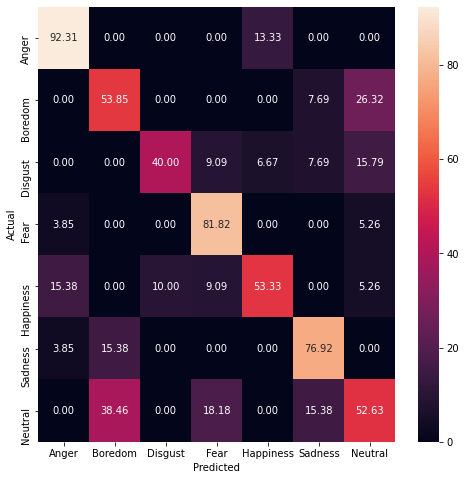

In [0]:
#cf = confusion_mat[i]
#cf = (cf / cf.astype(np.float).sum(axis=1)) *100

import seaborn as sns
target_names = ['Anger', 'Boredom', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Neutral']

#cmn = cm.astype('float')  
#cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(8,8))
ft = sns.heatmap(cf, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
#plt.show(block=False)
figure = ft.get_figure() 
figure.savefig('filtering_fb3_EBDCC_conf_mat_0db.png', dpi=400)

In [0]:
SNR_dB = ['0','10','20','clean']
num = ['1','2','3','4']

for i in range(4):
    cf = confusion_mat[i]
    cf = (cf / cf.astype(np.float).sum(axis=1)) *100

    import seaborn as sns
    target_names = ['Anger', 'Boredom', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Neutral']

    #cmn = cm.astype('float')  
    #cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(8,8))
    ft = sns.heatmap(cf, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    #plt.show(block=False)
    figure = ft.get_figure() 
    figure.savefig('fb{}_EBDCC_confusion_mat_clean_sgl.png'.format(num[i]), dpi=400)

In [0]:
#####copied running from 86th generation

In [0]:
#method-1 14.15 min/gen
#method-2  6.45 min/gen
#method-3 6.32 min/gen  80 gen--> 526 min
#method-4 13.89 min/gen

In [0]:
def zerocrossingRate(frame):
    signs= np.sign(frame)
    signs[signs == 0] = -1

    return len(np.where(np.diff(signs))[0])/len(frame)

In [0]:
def Mfcc_feature_zcr(X_data, fs, freq, filters):
    
    N_data=len(X_data)
    fs=8000   ## fs=8 kHz
    #feat_size = 42

    #feature_vect = np.zeros((N_data, feat_size))

    mfcc_coeff = np.zeros((N_data, 13))
    #delta_coeff = np.zeros((N_data, 13))
    #delta_delta_coeff = np.zeros((N_data, 13))
    #frame_energy = np.zeros((N_data,3))
    
    N = 256
    frame_len = 0.03*fs
    M = 13          #13 point dct of a voiced frame signal
    nf = 26
    
    ## using a 30-ms Hamming window with 7.5-ms step.
    for i in range (len(X_data)):
       
        frames = framesig(X_data[i], frame_len, frame_step= 0.75*frame_len, winfunc=np.hamming)
        frame_num = len(frames)

        y_fft=[]
        energy = []
        zcr=[]
        avg_energy = 0
        for jk in range(frame_num):
            temp = np.dot(frames[jk],frames[jk])
            energy.append(temp)
            avg_energy += temp
            zcr.append(zerocrossingRate(frames[jk]))


        avg_energy = avg_energy/frame_num
        threshold = avg_energy*0.2
        z_avg=np.mean(zcr)
        #voiced_energy = []

        for fr in range(len(frames)):
            if (energy[fr] > threshold and zcr[fr]<z_avg):                     #energy[q]/frame_len < 0.2, not dividing by frame_len
                #voiced_energy.append(energy[fr])
                temp_fft = np.absolute(np.fft.fft(frames[fr,:], N))
                y_fft.append(temp_fft*temp_fft)          

        #voiced_energy = np.asarray(voiced_energy)
        y_fft = np.asarray(y_fft)          # shape (-,256)
        y_fft = np.transpose(y_fft)

        #frame_energy[i,:] = [np.mean(voiced_energy), min(voiced_energy), max(voiced_energy) ]

        voiced_frame_no = y_fft.shape[1]   
        DCT_mat = np.zeros((voiced_frame_no,M))  

        for p in range (voiced_frame_no):        # p=1:frame_no                    
            E_spect=np.zeros(nf-3)          

            for q in range(nf-3):                # q=1:nf-3
                rr=np.arange(math.floor(freq[q]*N/fs)+1,math.ceil(freq[q+2]*N/fs)+1,1)   # rows of voiced frames

                E_spect[q]= filters[q,0:len(rr)].dot(y_fft[rr,p])
                if(E_spect[q] == math.nan or E_spect[q] == math.inf):
                    E_spect[q] = 0

            for ee in range (len(E_spect)):
                if(E_spect[ee]!=0 ):
                    E_spect[ee] = math.log(np.absolute(E_spect[ee]))
                else:
                    E_spect[ee] = 0

            DCT_mat[p,:]=np.absolute(scipy.fftpack.dct(E_spect,n=M))


        #delta_feat = delta(DCT_mat, N = len(DCT_mat))
        #delta_delta_feat = delta(delta_feat, N = len(DCT_mat))

        mfcc_coeff[i,:] = np.mean(DCT_mat,axis=0)
        #delta_coeff[i,:] = np.mean(delta_feat, axis = 0)
        #delta_delta_coeff[i,:] = np.mean(delta_delta_feat, axis = 0)

        #feature_vect[i,:] = np.hstack((mfcc_coeff[i,:], delta_coeff[i,:], delta_delta_coeff[i,:],
        #                                     frame_energy[i,:]))
    
    #return feature_vect, mfcc_coeff, delta_coeff, delta_delta_coeff, frame_energy
    return mfcc_coeff

In [0]:
# 13 dim mfcc dim.

def Mfcc_feature_noisysig(X_data, fs, freq, filters):
    
    N_data=len(X_data)
    fs=8000   ## fs=8 kHz
    feat_size = 13

    feature_vect = np.zeros((N_data, feat_size))

    mfcc_coeff = np.zeros((N_data, 13))
    #delta_coeff = np.zeros((N_data, 13))
    #delta_delta_coeff = np.zeros((N_data, 13))
    #frame_energy = np.zeros((N_data,3))
    
    N = 256
    frame_len = 0.03*fs
    M = 13          #13 point dct of a voiced frame signal
    nf = 26
    
    ## using a 30-ms Hamming window with 7.5-ms step.
    for i in range (N_data):
      
        frames = framesig(X_data[i], frame_len, frame_step= 0.75*frame_len, winfunc=np.hamming)
        frame_num = len(frames)

        y_fft=[]
        energy = []
        noisy_initial=np.zeros(N)
        z=1
        zcr=[]
        avg_energy = 0
        for jk in range(frame_num):
            temp = np.dot(frames[jk],frames[jk])
            energy.append(temp)
            avg_energy += temp
            zcr.append(zerocrossingRate(frames[jk]))


        avg_energy = avg_energy/frame_num
        threshold = avg_energy*0.2
        voiced_energy = []
        z_avg=np.mean(zcr)

        for fr in range(len(frames)):
            if (energy[fr] > threshold and zcr[fr]<z_avg):                     #energy[q]/frame_len < 0.2, not dividing by frame_len
                voiced_energy.append(energy[fr])
                temp_fft = np.absolute(np.fft.fft(frames[fr,:], N))
                y_fft.append(temp_fft*temp_fft)      # NOTE:- TAKING THE SQUARE OF THE FFT OF EACH FRAME
            else:
                if(z<=3):
                    temp_fft = np.absolute(np.fft.fft(frames[fr,:], N))
                    noisy_initial = noisy_initial + (temp_fft*temp_fft)
                    z=z+1
        
        voiced_energy = np.asarray(voiced_energy)
        y_fft = np.asarray(y_fft)          # shape (-,256)
        y_fft = np.transpose(y_fft)    
        voiced_frame_no = y_fft.shape[1]
        
        noisy_initial=noisy_initial/3              # estimating initial noise power spectrum
        lamda=0.97                                 #forgetting factor
        s_t = y_fft                                # spectrum of noisy signal
        noisy_t = np.zeros((N,voiced_frame_no))    # noise spectrum of each frame
        noisy_t[:,0] = lamda*noisy_initial + (1-lamda)*s_t[:,0]

        for qr in range (1,voiced_frame_no):                              # q=2:length(frame_energy)
            noisy_t[:,qr] = lamda*noisy_t[:,qr-1] + (1-lamda)*s_t[:,qr]

        #frame_energy[i,:] = [np.mean(voiced_energy), min(voiced_energy), max(voiced_energy) ]

        DCT_mat = np.zeros((voiced_frame_no,M))  

        for p in range (voiced_frame_no):        # p=1:frame_no                    
            E_spect=np.zeros(nf-3)
            E_noisy_spect=np.zeros(nf-3)        #output of nf Mel-scaled filter when estimated noise is passed 
                                                #through filter bank
            SNR=np.zeros(nf-3)
            entropy=np.zeros(nf-3)
            R=np.zeros(nf-3)
            zeta=np.zeros(nf-3)
            W=np.zeros(nf-3)

            for q in range(nf-3):                # q=1:nf-3
                rr=np.arange(math.floor(freq[q]*N/fs)+1,math.ceil(freq[q+2]*N/fs)+1,1)   # rows of voiced frames

                E_spect[q]= filters[q,0:len(rr)].dot(y_fft[rr,p])
                if(E_spect[q] == math.nan or E_spect[q] == math.inf):
                    E_spect[q] = 0
                
                E_noisy_spect[q]= filters[q,0:len(rr)].dot(noisy_t[rr,p])
            
                x=np.absolute(np.transpose(y_fft[rr,p]))
                for j in range (len(x)):                                    #j=1:length(x)
                    x_pmf=x[j]/np.sum(x)
                    entropy[q]=entropy[q]-x_pmf*math.log(x_pmf)
            
            
            ## sub-band wiener filtering        
            tap=20              ## no. of taps of wiener filter
            Rxy=np.correlate(E_spect,E_spect-E_noisy_spect)   # corr. b/t 
            Ry=np.correlate(E_spect,E_spect)            # noisy signal correlation
            m=round(len(Rxy)/2)
            Rxy=Rxy[m :m+tap-1]
            Ry=Ry[m:m+tap-1]
            R_Y=toeplitz(Ry)
            h=np.matmul(inv(R_Y),np.transpose(Rxy))             # Filter Coefficients
            E_SWF=np.convolve(E_spect,h)            # enhanced filterbank energy after mel sub-band wiener filtering
            #SWF- sub band wiener filtering

            ## Calculation of SNR and Entropy for mel sub-bands
            for tr in range(nf-3):                                 #i=1:nf-3
                SNR[tr]=np.sqrt(1+(E_SWF[tr]/E_noisy_spect[tr]))
                R[tr]=SNR[tr]/entropy[tr]                       # SNR to Entropy ratio for ith mel frequency sub-band

            np.nan_to_num(R,copy=False)          # converting nan to zero and inf to large finite no.
            mean_R=np.mean(R)
            sigma_R=np.sqrt(np.var(R))

            for bb in range(nf-3):                            # i=1:nf-3
                zeta[bb]=1-(1/(1+math.exp(-(R[bb]-mean_R)/sigma_R)))  
                W[bb]=1-math.exp(-R[bb]/zeta[bb])


            #log_ESF=[math.log1p(i) for i in E_SWF]
            E_SWF=np.absolute(E_SWF)
            for kk in range (len(E_SWF)):
                if(E_SWF[kk]!=0):
                    E_SWF[kk]=math.log(E_SWF[kk])
                else:
                    E_SWF[kk]=0

            spect=W*E_SWF
            DCT_mat[p,:]=np.absolute(scipy.fftpack.dct(spect,n=M))
            
        #delta_feat = delta(DCT_mat, N = len(DCT_mat))
        #delta_delta_feat = delta(delta_feat, N = len(DCT_mat))

        mfcc_coeff[i,:] = np.mean(DCT_mat,axis=0)
        #delta_coeff[i,:] = np.mean(delta_feat, axis = 0)
        #delta_delta_coeff[i,:] = np.mean(delta_delta_feat, axis = 0)

        #feature_vect[i,:] = np.hstack((mfcc_coeff[i,:], delta_coeff[i,:], delta_delta_coeff[i,:], frame_energy[i,:]))
    
    return mfcc_coeff


In [0]:
def Mfcc_feature(X_data, fs, freq, filters):
    
    N_data=len(X_data)
    fs=8000   ## fs=8 kHz
    #feat_size = 42

    #feature_vect = np.zeros((N_data, feat_size))

    mfcc_coeff = np.zeros((N_data, 13))
    #delta_coeff = np.zeros((N_data, 13))
    #delta_delta_coeff = np.zeros((N_data, 13))
    #frame_energy = np.zeros((N_data,3))
    
    N = 256
    frame_len = 0.03*fs
    M = 13          #13 point dct of a voiced frame signal
    nf = 26
    
    ## using a 30-ms Hamming window with 7.5-ms step.
    for i in range (len(X_data)):
       
        frames = framesig(X_data[i], frame_len, frame_step= 0.75*frame_len, winfunc=np.hamming)
        frame_num = len(frames)

        y_fft=[]
        energy = []
        avg_energy = 0
        for jk in range(frame_num):
            temp = np.dot(frames[jk],frames[jk])
            energy.append(temp)
            avg_energy += temp

        avg_energy = avg_energy/frame_num
        threshold = avg_energy*0.3
        #voiced_energy = []

        for fr in range(len(frames)):
            if (energy[fr] > threshold):                     #energy[q]/frame_len < 0.2, not dividing by frame_len
                #voiced_energy.append(energy[fr])
                temp_fft = np.absolute(np.fft.fft(frames[fr,:], N))
                y_fft.append(temp_fft*temp_fft)          

        #voiced_energy = np.asarray(voiced_energy)
        y_fft = np.asarray(y_fft)          # shape (-,256)
        y_fft = np.transpose(y_fft)

        #frame_energy[i,:] = [np.mean(voiced_energy), min(voiced_energy), max(voiced_energy) ]

        voiced_frame_no = y_fft.shape[1]   
        DCT_mat = np.zeros((voiced_frame_no,M))  

        for p in range (voiced_frame_no):        # p=1:frame_no                    
            E_spect=np.zeros(nf-3)          

            for q in range(nf-3):                # q=1:nf-3
                rr=np.arange(math.floor(freq[q]*N/fs)+1,math.ceil(freq[q+2]*N/fs)+1,1)   # rows of voiced frames

                E_spect[q]= filters[q,0:len(rr)].dot(y_fft[rr,p])
                if(E_spect[q] == math.nan or E_spect[q] == math.inf):
                    E_spect[q] = 0

            for ee in range (len(E_spect)):
                if(E_spect[ee]!=0 ):
                    E_spect[ee] = math.log(np.absolute(E_spect[ee]))
                else:
                    E_spect[ee] = 0

            DCT_mat[p,:]=np.absolute(scipy.fftpack.dct(E_spect,n=M))


        #delta_feat = delta(DCT_mat, N = len(DCT_mat))
        #delta_delta_feat = delta(delta_feat, N = len(DCT_mat))

        mfcc_coeff[i,:] = np.mean(DCT_mat,axis=0)
        #delta_coeff[i,:] = np.mean(delta_feat, axis = 0)
        #delta_delta_coeff[i,:] = np.mean(delta_delta_feat, axis = 0)

        #feature_vect[i,:] = np.hstack((mfcc_coeff[i,:], delta_coeff[i,:], delta_delta_coeff[i,:],
        #                                     frame_energy[i,:]))
    
    #return feature_vect, mfcc_coeff, delta_coeff, delta_delta_coeff, frame_energy
    return mfcc_coeff

In [0]:
def data_norm_and_split(X_set,Y_data):
    Xx = X_set
    yy = np.asarray(Y_data)

    X_t, X_v, y_t, y_v = train_test_split(Xx,yy,test_size=0.2,random_state=27)

    scaler = preprocessing.StandardScaler()
    Xt_trans = scaler.fit_transform(X_t)
    Xv_trans = scaler.fit_transform(X_v)
    
    return Xt_trans,Xv_trans,y_t,y_v


def splineinterpolation(xv,yv,yp1,ypn):

    y2=np.zeros(4)         #2nd derivative
    n=len(y2)
    u=np.zeros(n-1)
    
    if (yp1 > 0.99e99):
        y2[0]=0
        u[0]=0
    else:
        y2[0]=yp1
        u[0]=(3.0/(xv[1]-xv[0]))*((yv[1]-yv[0])/(xv[1]-xv[0]-yp1))
    

    for i in range(1,n-1):                          #i=2:n-1
        sig=(xv[i]-xv[i-1])/(xv[i+1]-xv[i-1])
        p=sig*y2[i-1]+2.0
        y2[i]=(sig-1.0)/p
        u[i]=(yv[i+1]-yv[i])/(xv[i+1]-xv[i]) - (yv[i]-yv[i-1])/(xv[i]-xv[i-1])
        u[i]=(6.0*u[i]/(xv[i+1]-xv[i-1])-sig*u[i-1])/p
    

    if(ypn > 0.99e99):
        qn=0
        un=0
    else:
        qn=0.5
        un=(3.0/(xv[n-1]-xv[n-2]))*(ypn-(yv[n-1]-yv[n-2])/(xv[n-1]-xv[n-2]))
    
    y2[n-1]=(un-qn*u[n-2])/(qn*y2[n-2]+1.0)
                                     
    for k in np.arange(n-2,-1,-1):                                        # k=n-1:-1:1
        y2[k]=y2[k]*y2[k+1]+u[k]
    

    nf=26
    jl=1
    klo=jl
    khi=jl+1
    xx=xv
    h=xx[khi]-xx[klo]
                                     
    #if(h==0) % throw warning
                                     
    x = np.linspace(0,1,nf+3)          # nf+1 points bt 0 & 1, excluding 0 & 1
    x=np.delete(x,[0])
    x=np.delete(x,[27])
                            
    y=np.zeros(nf+1)
    
    for i in range (nf+1):                                 # i=1:nf+1
        a=(xx[khi]-x[i])/h
        b=(x[i]-xx[klo])/h
        y[i]=a*yv[klo]+b*yv[khi]+((a*a*a-a)*y2[klo]+(b*b*b-b)*y2[khi])*(h*h)/6.0
        if(y[i]<0):
            y[i]=0
        if(y[i]>1):
            y[i]=1
        
    #x=[0,x,1];
    #y=[0,y,1];
    # plot(x,y);

    return y


def Evolution(EA_population,accuracy,yv,g,y2_rand):
    import random
    total_fbank=30
    current_member = 1
    lamda=20                                                                #selecting lamda individuals from 30 chromosomes
    chromo_size=10
    mating_pool=np.zeros((total_fbank,chromo_size))
    val =max(accuracy[:,g])
    best_indx=accuracy[:,g].tolist().index(max(accuracy[:,g]))
    best_individual=EA_population[best_indx,:]                             # best individual out of 30 individuals
    mating_pool[0,:]=best_individual                                       #elitist strategy
    #qq=np.zeros(lamda-1)
    qq=[]
    while current_member <lamda:
        rand_ind=random.sample(range(total_fbank), 10)                     # picking 10 individuals randomly out of 30
        best=0
        counter=0
        for j in range(len(rand_ind)):
            if current_member==1 and accuracy[rand_ind[j],g] > best and rand_ind[j]!=best_indx:
                best= accuracy[rand_ind[j],g]
                counter=j
            elif current_member >1 and accuracy[rand_ind[j],g] > best and rand_ind[j]!=best_indx:
                inter=list(set(qq) & set(rand_ind))
                if not inter:
                    best=accuracy[rand_ind[j],g]
                    counter=j
                else:
                    continue
               
        if (counter>0):
            mating_pool[current_member,:]=EA_population[rand_ind[counter],:]
            qq.append(rand_ind[counter])
            current_member+=1
      
    ## ONE POINT CROSSOVER
      
    slt=np.random.permutation(20) 
    select=slt.tolist()
    select.remove(0) 
    kk=20
    total=list(range(0,30))
    r=list(set(total).difference(set(qq)))
    if best_indx in r:
        r.remove(best_indx)
    n=len(r)
    
    for q in range(0,18,2):
        prob_crr = np.random.random()
        if (prob_crr <= 0.9):
            point=random.randint(1,8)
            mating_pool[kk,:]=mating_pool[select[q],0:point].tolist() + mating_pool[select[q+1],point:].tolist()
                                 
        else:
            p=np.random.randint(n)
            prnt_idx=r[p]
            r.remove(prnt_idx)
            n=n-1
            mating_pool[kk,:]=EA_population[prnt_idx,:]
                                  
    ### MUTATION OPERATOR ###
        for zz in range(chromo_size):
            if np.random.random() <= 0.12 :                                     #mutation probability is 0.12
                mating_pool[kk,zz]=np.random.random()
              
             
        kk=kk+1
        if (kk==29):
            mating_pool[kk,:]=[mating_pool[19,i] + mating_pool[18,i] for i in range(len(mating_pool[19,:]))] 
            #mating_pool[kk,:]=mating_pool[19,:]mating_pool[18,:]      # making last mating population as the combi of 19th & 20th mating population
        
    EA_population=mating_pool
    
    ## PARAMETER UPDATION
    for ff in range(total_fbank): 
        ## spline1 parameter updation
        a1=0.1
        yv[ff,1]=EA_population[ff,0]
        if yv[ff,1]>=1:
            yv[ff,1]=a1+np.random.random()*(1-2*a1)                      # parameter to limit range of spline in bet. 0 & 1   
            EA_population[ff,0]=yv[ff,1]
                                  
        y2_temp=EA_population[ff,0]+EA_population[ff,1]
        if (y2_temp >1):
            delta_temp=np.random.random()*(1-a-yv[ff,1])
            y2_temp=delta_temp+yv[ff,1]
            EA_population[ff,1]=delta_temp
                                  
        yv[ff,2]=y2_temp
         
        ### spline2 parameter updation
        y2_rand[ff,:]=EA_population[ff,4:]
        for i in range(6):
            if (y2_rand[ff,i]>0.9 or y2_rand[ff,i]<0.25):
                y2_rand[ff,i]=np.random.random()*(0.9-0.25)+0.25
                EA_population[ff,i+4]=y2_rand[ff,i]
          
              
    
    return EA_population,yv,y2_rand





In [0]:
def best_estimator(feature_vect, Y_all):
    
    scaler = MinMaxScaler(feature_range=(-1, 1))
    X = scaler.fit_transform(feature_vect)
    y = np.asarray(Y_all)

    seed = 42
    X_shuffle, y_shuffle = shuffle(X, y, random_state=seed)
    X_train, X_test, y_train, y_test = train_test_split(X_shuffle,y_shuffle,test_size=0.2,random_state=27)
    #X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)
  
    param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
    
    grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 10)
    grid.fit(X_train,y_train)
    #print("best_estimator :- ", grid.best_estimator_, "\n")
    best_svc = grid.best_estimator_
    best_svc.fit(X_train, y_train)
    y_pred = best_svc.predict(X_test)
    cf = confusion_matrix(y_test,y_pred)
    cr = classification_report(y_test, y_pred)
    print(cf)
    print(cr)
    best_accuracy = best_svc.score(X_test, y_test)

    return best_accuracy, cf, cr


In [0]:
def AWGN_new(X,snr):
    N = len(X)
    y_noisy = []
    for i in range(N): 
        x=X[i]
        sig_power = np.mean(np.abs(x.tolist())**2)
        sig_db = 10 * np.log10(sig_power)
        noise_db = sig_db -snr
        noise_power = 10 ** (noise_db / 10)
        # Generate an sample of white noise
        mean_noise = 0
        noise = np.random.normal(mean_noise, np.sqrt(noise_power), len(x))
        # Noise up the original signal
        y_noisy.append(x + noise)
    return y_noisy

In [0]:
def parameter_tuning(feature_vect, Y_all):
    
    scaler = MinMaxScaler(feature_range=(-1, 1))
    X = scaler.fit_transform(feature_vect)
    y = np.asarray(Y_all)

    seed = 42
    X_shuffle, y_shuffle = shuffle(X, y, random_state=seed)
    X_train, X_test, y_train, y_test = train_test_split(X_shuffle,y_shuffle,test_size=0.2,random_state=27)
       
    param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid']}
    
    grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 10)
    grid.fit(X_train,y_train)
    print("best_estimator :- ", grid.best_estimator_, "\n")

    grid_predictions = grid.predict(X_test)
    print("confusion_matrix :-" , confusion_matrix(y_test,grid_predictions))
    print("classification_report :-" , classification_report(y_test,grid_predictions))
    print("score:- " , grid.score(X_test,y_test),"\n")

    scores_best = {"True":[], "False": []}
    shuffs = [True, False]

    for shuff in shuffs:
        print(colored("The observation is made when shuffle is {}".format (shuff), 'red', 'on_grey'), "\n")
        best_svc = grid.best_estimator_

        # k-fold cross validation
        cv = KFold(n_splits=10, random_state=42, shuffle = shuff)
        for train_index, test_index in cv.split(X):
            
            #print("Train Index: ", train_index, "\n")
            #print("Test Index: ", test_index)
            X_train_1, X_test_1, y_train_1, y_test_1 = X[train_index], X[test_index], y[train_index], y[test_index]
            best_svc.fit(X_train_1, y_train_1)
            if(shuff == True):
                scores_best["True"].append(best_svc.score(X_test_1, y_test_1))
            else:
                scores_best["False"].append(best_svc.score(X_test_1, y_test_1))

            print("\n ")
        
    Score_shuff_true=scores_best["True"]
    Score_shuff_false = scores_best["False"]    
    return np.mean(Score_shuff_true), np.mean(Score_shuff_false)

In [0]:
def Mfcc_revised_noisy(X_data, fs, freq, filters):
    
    N_data=len(X_data)
    fs=8000   ## fs=8 kHz
    feat_size = 42

    feature_vect = np.zeros((N_data, feat_size))

    mfcc_coeff = np.zeros((N_data, 13))
    delta_coeff = np.zeros((N_data, 13))
    delta_delta_coeff = np.zeros((N_data, 13))
    frame_energy = np.zeros((N_data,3))
    
    N = 256
    frame_len = 0.03*fs
    M = 13          #13 point dct of a voiced frame signal
    nf = 26
    
    ## using a 30-ms Hamming window with 7.5-ms step.
    for i in range (N_data):
      
        frames = framesig(X_data[i], frame_len, frame_step= 0.75*frame_len, winfunc=np.hamming)
        frame_num = len(frames)

        y_fft=[]
        energy = []
        noisy_initial=np.zeros(N)
        z=1
        avg_energy = 0
        for jk in range(frame_num):
            temp = np.dot(frames[jk],frames[jk])
            energy.append(temp)
            avg_energy += temp

        avg_energy = avg_energy/frame_num
        threshold = avg_energy*0.2
        voiced_energy = []

        for fr in range(len(frames)):
            if (energy[fr] > threshold):                     #energy[q]/frame_len < 0.2, not dividing by frame_len
                voiced_energy.append(energy[fr])
                temp_fft = np.absolute(np.fft.fft(frames[fr,:], N))
                y_fft.append(temp_fft*temp_fft)      # NOTE:- TAKING THE SQUARE OF THE FFT OF EACH FRAME
            else:
                if(z<=3):
                    temp_fft = np.absolute(np.fft.fft(frames[fr,:], N))
                    noisy_initial = noisy_initial + (temp_fft*temp_fft)
                    z=z+1
        
        voiced_energy = np.asarray(voiced_energy)
        y_fft = np.asarray(y_fft)          # shape (-,256)
        y_fft = np.transpose(y_fft)    
        voiced_frame_no = y_fft.shape[1]
        
        noisy_initial=noisy_initial/3              # estimating initial noise power spectrum
        lamda=0.97                                 #forgetting factor
        s_t = y_fft                                # spectrum of noisy signal
        noisy_t = np.zeros((N,voiced_frame_no))    # noise spectrum of each frame
        noisy_t[:,0] = lamda*noisy_initial + (1-lamda)*s_t[:,0]

        for qr in range (1,voiced_frame_no):                              # q=2:length(frame_energy)
            noisy_t[:,qr] = lamda*noisy_t[:,qr-1] + (1-lamda)*s_t[:,qr]

        frame_energy[i,:] = [np.mean(voiced_energy), min(voiced_energy), max(voiced_energy) ]

        DCT_mat = np.zeros((voiced_frame_no,M))  

        for p in range (voiced_frame_no):        # p=1:frame_no                    
            E_spect=np.zeros(nf-3)
            E_noisy_spect=np.zeros(nf-3)        #output of nf Mel-scaled filter when estimated noise is passed 
                                                #through filter bank
            SNR=np.zeros(nf-3)
            entropy=np.zeros(nf-3)
            R=np.zeros(nf-3)
            zeta=np.zeros(nf-3)
            W=np.zeros(nf-3)

            for q in range(nf-3):                # q=1:nf-3
                rr=np.arange(math.floor(freq[q]*N/fs)+1,math.ceil(freq[q+2]*N/fs)+1,1)   # rows of voiced frames

                E_spect[q]= filters[q,0:len(rr)].dot(y_fft[rr,p])
                if(E_spect[q] == math.nan or E_spect[q] == math.inf):
                    E_spect[q] = 0
                
                E_noisy_spect[q]= filters[q,0:len(rr)].dot(noisy_t[rr,p])
            
                x=np.absolute(np.transpose(y_fft[rr,p]))
                for j in range (len(x)):                                    #j=1:length(x)
                    x_pmf=x[j]/sum(x)
                    entropy[q]=entropy[q]-x_pmf*math.log(x_pmf)
            
            
            ## sub-band wiener filtering        
            tap=20              ## no. of taps of wiener filter
            Rxy=np.correlate(E_spect,E_spect-E_noisy_spect)   # corr. b/t 
            Ry=np.correlate(E_spect,E_spect)            # noisy signal correlation
            m=round(len(Rxy)/2)
            Rxy=Rxy[m :m+tap-1]
            Ry=Ry[m:m+tap-1]
            R_Y=toeplitz(Ry)
            h=np.matmul(inv(R_Y),np.transpose(Rxy))             # Filter Coefficients
            E_SWF=np.convolve(E_spect,h)            # enhanced filterbank energy after mel sub-band wiener filtering
            #SWF- sub band wiener filtering

            ## Calculation of SNR and Entropy for mel sub-bands
            for tr in range(nf-3):                                 #i=1:nf-3
                SNR[tr]=np.sqrt(1+(E_SWF[tr]/E_noisy_spect[tr]))
                R[tr]=SNR[tr]/entropy[tr]                       # SNR to Entropy ratio for ith mel frequency sub-band

            np.nan_to_num(R,copy=False)          # converting nan to zero and inf to large finite no.
            mean_R=np.mean(R)
            sigma_R=np.sqrt(np.var(R))

            for bb in range(nf-3):                            # i=1:nf-3
                zeta[bb]=1-(1/(1+math.exp(-(R[bb]-mean_R)/sigma_R)))  
                W[bb]=1-math.exp(-R[bb]/zeta[bb])


            #log_ESF=[math.log1p(i) for i in E_SWF]
            E_SWF=np.absolute(E_SWF)
            for kk in range (len(E_SWF)):
                if(E_SWF[kk]!=0):
                    E_SWF[kk]=math.log(E_SWF[kk])
                else:
                    E_SWF[kk]=0

            spect=W*E_SWF
            DCT_mat[p,:]=np.absolute(scipy.fftpack.dct(spect,n=M))
            
        delta_feat = delta(DCT_mat, N = len(DCT_mat))
        delta_delta_feat = delta(delta_feat, N = len(DCT_mat))

        mfcc_coeff[i,:] = np.mean(DCT_mat,axis=0)
        delta_coeff[i,:] = np.mean(delta_feat, axis = 0)
        delta_delta_coeff[i,:] = np.mean(delta_delta_feat, axis = 0)

        feature_vect[i,:] = np.hstack((mfcc_coeff[i,:], delta_coeff[i,:], delta_delta_coeff[i,:],
                                             frame_energy[i,:]))
    
    return feature_vect, mfcc_coeff, delta_coeff, delta_delta_coeff, frame_energy


In [0]:
def SVM_accuracy(X_train,X_valid,Y_train,Y_valid):
    y_pred=[]
    accuracy=[]
    
    for kernel in ('linear', 'rbf', 'poly'):
        clf = SVC(kernel=kernel)
        clf.fit(X_train, Y_train)
        #print(clf.score(X_valid,Y_valid))
        
        accuracy.append(clf.score(X_valid,Y_valid))
        y_pred.append(clf.predict(X_valid))
    
    ## for confusion matrix
    #cm1 = ConfusionMatrix(actual_vector=Y_valid, predict_vector=y_pred[0])
    
    return accuracy[2]                   # here we are returning o/p from linear kernel
    
    

##### data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

##### fit scaler on training data
norm = MinMaxScaler().fit(X_train)

##### transform training data
X_train_norm = norm.transform(X_train)

##### transform testing dataabs
X_test_norm = norm.transform(X_test)

In [0]:
def Mfcc_revised_1(X_data, fs, freq, filters):
    
    N_data=len(X_data)
    fs=8000   ## fs=8 kHz
    feat_size = 42

    feature_vect = np.zeros((N_data, feat_size))

    mfcc_coeff = np.zeros((N_data, 13))
    delta_coeff = np.zeros((N_data, 13))
    delta_delta_coeff = np.zeros((N_data, 13))
    frame_energy = np.zeros((N_data,3))
    
    N = 256
    frame_len = 0.03*fs
    M = 13          #13 point dct of a voiced frame signal
    nf = 26
    
    ## using a 30-ms Hamming window with 7.5-ms step.
    for i in range (len(X_data)):
       
        frames = framesig(X_data[i], frame_len, frame_step= 0.75*frame_len, winfunc=np.hamming)
        frame_num = len(frames)

        y_fft=[]
        energy = []
        avg_energy = 0
        for jk in range(frame_num):
            temp = np.dot(frames[jk],frames[jk])
            energy.append(temp)
            avg_energy += temp

        avg_energy = avg_energy/frame_num
        threshold = avg_energy*0.3
        voiced_energy = []

        for fr in range(len(frames)):
            if (energy[fr] > threshold):                     #energy[q]/frame_len < 0.2, not dividing by frame_len
                voiced_energy.append(energy[fr])
                temp_fft = np.absolute(np.fft.fft(frames[fr,:], N))
                y_fft.append(temp_fft*temp_fft)          

        voiced_energy = np.asarray(voiced_energy)
        y_fft = np.asarray(y_fft)          # shape (-,256)
        y_fft = np.transpose(y_fft)

        frame_energy[i,:] = [np.mean(voiced_energy), min(voiced_energy), max(voiced_energy) ]

        voiced_frame_no = y_fft.shape[1]   
        DCT_mat = np.zeros((voiced_frame_no,M))  

        for p in range (voiced_frame_no):        # p=1:frame_no                    
            E_spect=np.zeros(nf-3)          

            for q in range(nf-3):                # q=1:nf-3
                rr=np.arange(math.floor(freq[q]*N/fs)+1,math.ceil(freq[q+2]*N/fs)+1,1)   # rows of voiced frames

                E_spect[q]= filters[q,0:len(rr)].dot(y_fft[rr,p])
                if(E_spect[q] == math.nan or E_spect[q] == math.inf):
                    E_spect[q] = 0

            for ee in range (len(E_spect)):
                if(E_spect[ee]!=0 ):
                    E_spect[ee] = math.log(np.absolute(E_spect[ee]))
                else:
                    E_spect[ee] = 0

            DCT_mat[p,:]=np.absolute(scipy.fftpack.dct(E_spect,n=M))


        delta_feat = delta(DCT_mat, N = len(DCT_mat))
        delta_delta_feat = delta(delta_feat, N = len(DCT_mat))

        mfcc_coeff[i,:] = np.mean(DCT_mat,axis=0)
        delta_coeff[i,:] = np.mean(delta_feat, axis = 0)
        delta_delta_coeff[i,:] = np.mean(delta_delta_feat, axis = 0)

        feature_vect[i,:] = np.hstack((mfcc_coeff[i,:], delta_coeff[i,:], delta_delta_coeff[i,:],
                                             frame_energy[i,:]))
    
    return feature_vect, mfcc_coeff, delta_coeff, delta_delta_coeff, frame_energy
